#### Logistic regression, example with three output options (multinomial/multiclass)

In [24]:
# usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [25]:
# load iris as the test dataset
df = sns.load_dataset("iris")

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [ ]:
# not much data, but it's balanced
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
# no missing values it seems
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(1)

In [ ]:
# drop duplicate values
df = df.drop_duplicates()

### X/y -split + VIF

In [31]:
# a small trick => use everything else except, the target
X = df.drop("species", axis=1)

# our target variable is y
y = df["species"]

In [32]:
# pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, confusing the logistic regression)
print(vif_data)

# in this case, sepal and petal length have quite high values, 
# potentially implying multicollinearity
# since we don't have much data anyways, we're not going to drop anything out

        feature    VIF
0  sepal_length 262.01
1   sepal_width  96.11
2  petal_length 171.34
3   petal_width  54.86


#### Train/test-split and scaling is still the same...

In [33]:
# create train/test split with scikit-learn's helper function
# random_state is optional, you can lock down the randomness for same results everytime
# this is sometimes helpful when you want to minimize randomness in order to maximize optimizations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# in logisticr regression, SCALE THE VALUES

# initialize the scaler and process X-values
# IN MOST CASES you can experiment with MinMaxScaler 
# and StandardScaler, ONLY USE ONE SCALER AT A TIME
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# use fit_transform only once in the beginning
# and use transform after that everywhere
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### ... but model training etc. is a bit different in multinomial situation

In [35]:
# since we are using multinomial logistic regression
# we have to use multi_class -parameter AND A SOLVER
# that supports multi-class 
model = LogisticRegression(solver="newton-cg")
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Classification error metrics

In [36]:
# get the test predictions for metrics as usual
predictions = model.predict(X_test)

In [37]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Model overall accuracy: 100.00%


In [38]:
df['species'].unique()

<StringArray>
['setosa', 'versicolor', 'virginica']
Length: 3, dtype: str

In [39]:
# save the actual names of the target values 
# so our confusion matrix is easier to read
labels = ['setosa', 'versicolor', 'virginica']

[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


<Axes: >

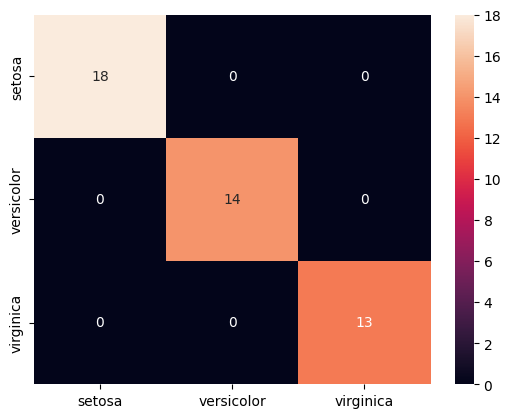

In [40]:
print(confusion_matrix(y_test, predictions))

# use seaborn and labels to make a better confusion matrix
# basically we wrap the confusion matrix into a pandas DataFrame
cm_array = confusion_matrix(y_test, predictions)
cm_array_df = pd.DataFrame(cm_array, index=labels, columns=labels)
sns.heatmap(cm_array_df, annot=True, fmt='g')

In [ ]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means, there's still something to optimize
# if this falls under 0.5, random guessing works better than this model

# in multiclass situations, use multi_clas="ovr" as the parameter
roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")

1.0

<Axes: xlabel='sepal_length', ylabel='petal_length'>

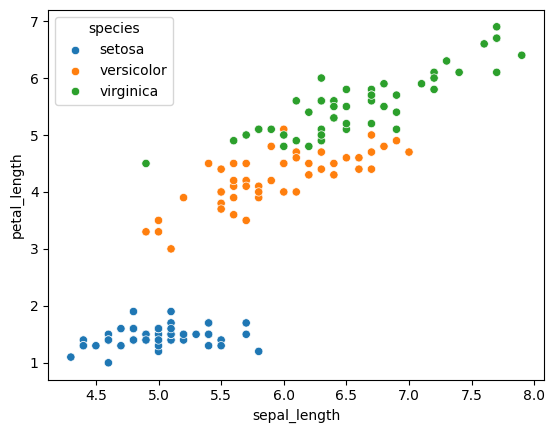

In [42]:
sns.scatterplot(x="sepal_length", y='petal_length', data=df, hue="species")

### Let's try the model in practice with a new flower

In [43]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.70,3.00,5.20,2.30,virginica
146,6.30,2.50,5.00,1.90,virginica
147,6.50,3.00,5.20,2.00,virginica
148,6.20,3.40,5.40,2.30,virginica
149,5.90,3.00,5.10,1.80,virginica


In [44]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='str')

In [45]:
# switch to decimal format in probabilities
# default is scientific notation (which is more difficult to read)
np.set_printoptions(suppress=True) 
pd.set_option('display.float_format', '{:.2f}'.format)  

In [46]:
# 6.70	3.00	5.20	2.30	virginica
tester_row = {
    'sepal_length': 7.1, 
    'sepal_width': 3.2, 
    'petal_length': 5.7, 
    'petal_width': 2.05
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])

# scale the tester_row -values
tester_row = sc.transform(tester_row)

# create prediction values for categories
prediction = model.predict_proba(tester_row)

print("All probabilities by category:")
print(labels)
print(prediction)
print()

# change these based on your original data
labels = ['setosa', 'versicolor', 'virginica']

# get index of highest probability with NumPy's argmax()-function
result_index = np.argmax(prediction)

print("Detected flower species:")
result = labels[result_index]
print(result)
print("-------------------")

All probabilities by category:
['setosa', 'versicolor', 'virginica']
[[0.00008568 0.06739883 0.93251549]]

Detected flower species:
virginica
-------------------
